# Comparison of different approches

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import copy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
# plt.style.use('seaborn-darkgrid')
import os
import json
import scipy.stats
from tqdm import tqdm_notebook as tqdm
from sklearn.neighbors import NearestNeighbors

In [2]:
def exploration(X_s, bins=10):
    """
    This function computes the exploration measure, i.e. the number of cells reached in the state space.

    Args:
        + X_s: the set of explored states
        + bins: the number of bins per dimension
    """

    n_samples, n_dim = X_s.shape
    hist, _ = np.histogramdd(X_s, bins=bins, range=np.array([[-1]*n_dim, [1]* n_dim]).T)
    
    return float(hist[hist>0].size) / float(hist.size)

In [3]:
dataset = pd.DataFrame()

## Either load results of paper

In [4]:
dataset = pd.read_pickle('armballs_dataset.pkl')

## Or load results of your campaign
(skip this if you did not run any campaign)

In [10]:
folders = [fil for fil in os.listdir('./armballs/') if fil[0] == "M" or fil[0] == "R"]

In [19]:
for fold in tqdm(folders):
    
    try:  
        with open(os.path.join('./armballs/' + fold, "config.json")) as f:
            config = json.load(f)

        explored_states = np.load(os.path.join('./armballs/' + fold, 'explored_states.npy'))

    except Exception as e:
        print("Folder %s failed with exception %s" % (fold, str(e)))
        continue

    max_iter = 10000
    n_epochs = 30
    for i in range(n_epochs):
        serie = copy.copy(config)
        iteration = int(i * max_iter / n_epochs)
        serie.update({'epoch': iteration})
        serie.update({'exploration_30': exploration(explored_states[:iteration, -2:], bins=30)})
        
        dataset = dataset.append(serie, ignore_index=True)

HBox(children=(IntProgress(value=0, max=1380), HTML(value='')))

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: RuntimeWarning: overflow encountered in multiply
  return getattr(obj, method)(*args, **kwds)


In [20]:
ds = dataset['name'].str.extract("^(.*)\:(armballs|Armball|Armarrow)")
dataset["algorithm"] = ds[0]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [21]:
dataset = dataset.replace('MGE-REP_rep:betavae_nmodules:5_im:normal_env', 'MGE-betaVAE')
dataset = dataset.replace('MGE-REP_rep:vae_nmodules:5_im:normal_env', 'MGE-VAE')
dataset = dataset.replace('MGE-REP_rep:betavae_nmodules:1_im:normal_env', 'RGE-betaVAE')
dataset = dataset.replace('MGE-REP_rep:vae_nmodules:1_im:normal_env', 'RGE-VAE')
dataset = dataset.replace('MGE-FI_rep:modular_im:uniform_env', 'MGE-EFR')
dataset = dataset.replace('MGE-FI_rep:flat_im:uniform_env', 'RGE-EFR')
dataset = dataset.replace('RPE_env', 'RPE')

In [8]:
# dataset.to_pickle(path='armballs_dataset.pkl')

## Comparison of different algorithms

/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


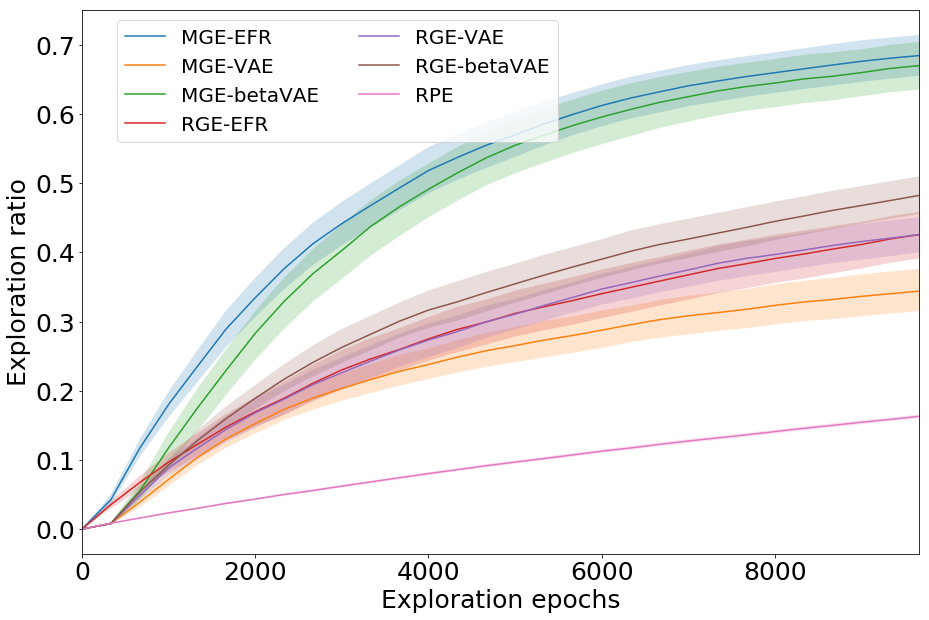

In [8]:
fontsize = 25
explo_noise_sdev = 0.05 # or 0.1
object_size = 0.1
interest_model = 'normal'
ds = dataset.fillna({'interest_model': interest_model})
ds = ds.fillna({'explo_noise_sdev': explo_noise_sdev})
ds = ds.query('explo_noise_sdev==@explo_noise_sdev').sort_values(['algorithm'])
ds = ds.query('object_size==@object_size')
# ds = ds.query('interest_model=="uniform" or interest_model=="normal"')
plt.figure(figsize=(15, 10))
sns.tsplot(data=ds, time='epoch', value='exploration_30', unit='name', condition='algorithm', ci=95)
plt.ylabel('Exploration ratio', fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.xlabel("Exploration epochs", fontsize=fontsize)
plt.legend(title="", fontsize=20, loc=1, frameon=1, ncol=2, fancybox=True, bbox_to_anchor=(.58, 1.));
# plt.savefig('figures/comparison_armballs_exploration_explonoise' + str(explo_noise_sdev) + '.png')

## Analysis of exploration

In [6]:
# fold = 'MGE-REP_rep:betavae_nmodules:5_im:normal_env:armballs_objectsize:0.1_distract_noise:0.1_explonoise:0.1_date:060618-1801-654/'
fold = 'MGE-REP_rep:vae_nmodules:5_im:active_env:armballs_objectsize:0.1_distract_noise:0.1_explonoise:0.1_date:060618-1723-552/'

interests_evolution = np.load(os.path.join('./armballs/' + fold, 'interests_evolution.npy'))

### Interest curves

Text(0,0.5,'Interest')

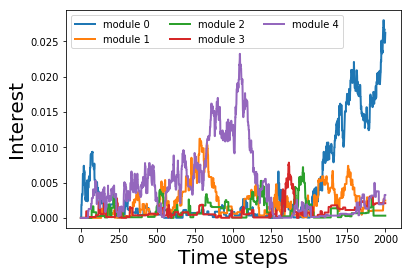

In [7]:
fig, ax = plt.subplots()
ax.plot(interests_evolution[:], lw=2)
ax.legend(["module 0", "module 1", "module 2", "module 3", "module 4", "module 5"], ncol=3)
ax.set_xlabel('Time steps', fontsize=20)
ax.set_ylabel('Interest', fontsize=20)
# plt.savefig('figures/interest_mge_vae.png')

### Explo curves

In [11]:
sorted_fold = folders[:50]
sorted_fold.sort()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


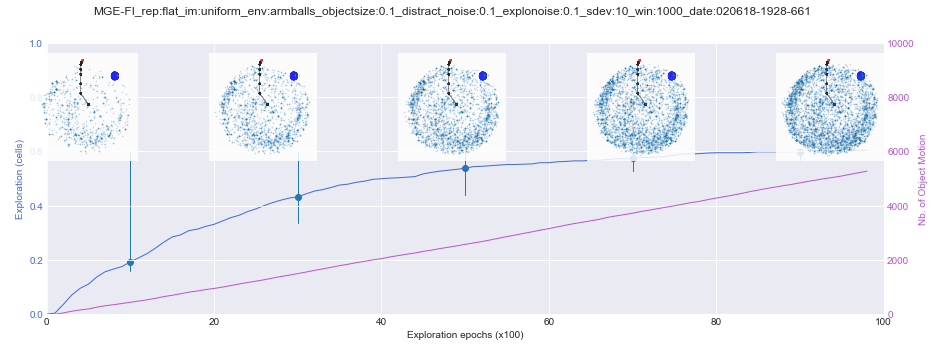

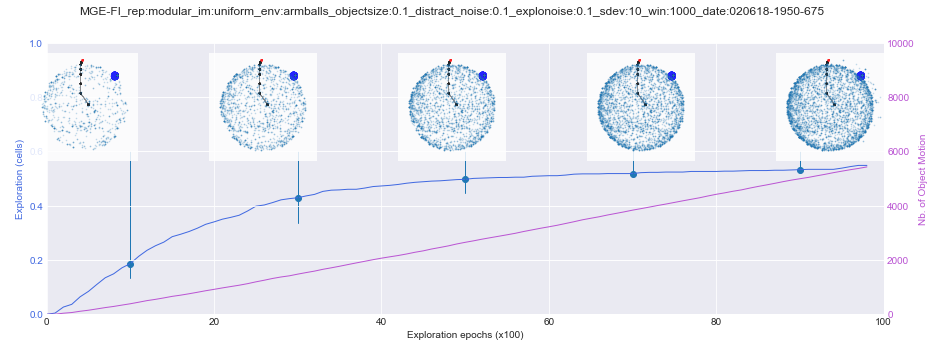

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


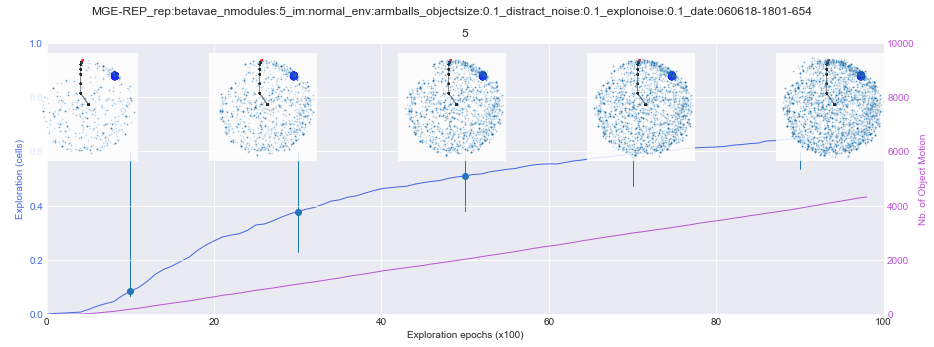

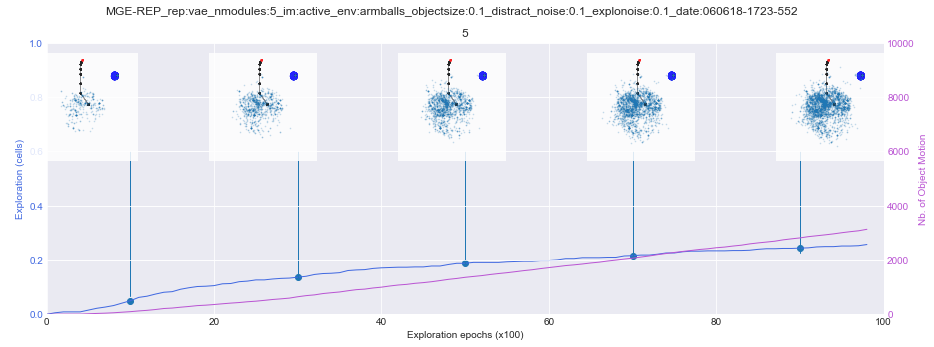

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: RuntimeWarning: overflow encountered in multiply
  return getattr(obj, method)(*args, **kwds)


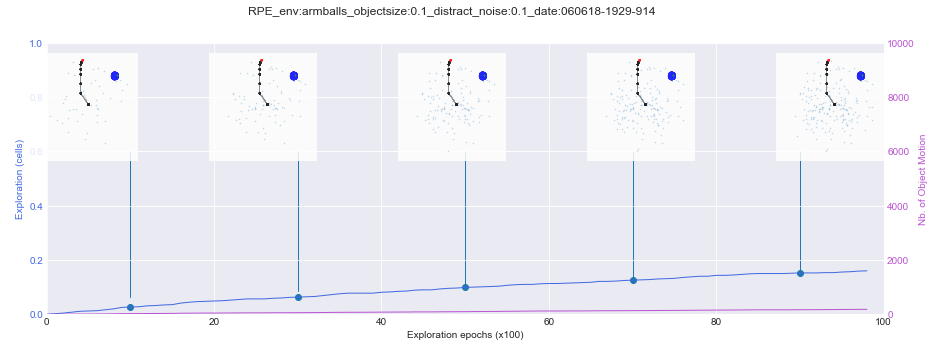

In [12]:
for fold in sorted_fold:
    
    with open(os.path.join('./armballs/' + fold, "config.json")) as f:
        config = json.load(f)

    explored_states = np.load(os.path.join('./armballs/' + fold, 'explored_states.npy'))

    kls = np.zeros((99))
    expl = np.zeros((99))
    # X_real = sample_in_attainable(explored_states_history[498].shape[0], 'armball')

    for i in range(99):   
        #explored = explored_states_history[i*10][np.where(explored_states_history[i*10]!=[.6, .6])[1]]
        explored = explored_states[:i*100, -2:]
        kls[i] = exploration(explored, bins=30)
        expl[i] = np.sum(np.linalg.norm(explored_states[:i*100, -2:] - np.array([0.6, 0.6]), axis=1, ord=2) > 1e-3)
        #expl[i] /= explored_states_history[i*10].shape[0]

    arm = scipy.misc.imread('test.png')
    cmap='Blues'
    plt.style.use('seaborn-darkgrid')

    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(fold)
    try:
        plt.title(config['n_modules'])
    except:
        pass

    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(kls,linewidth=1., color='royalblue')
    ax1.tick_params(axis='y', colors='royalblue')
    ax1.set_ylim(0, 1)
    ax1.set_yticks(np.linspace(0, 1, 6))
    ax1.set_xlim(0., 100.)
    ax1.set_xlabel("Exploration epochs (x100)")
    ax1.set_ylabel("Exploration (cells)", color='royalblue')
    ax1.add_line(matplotlib.lines.Line2D([5 * 2, 5 * 2],   [kls[5] + .05, 0.6], linewidth=1))
    ax1.add_line(matplotlib.lines.Line2D([15 * 2, 15 * 2], [kls[15] + .05, 0.6], linewidth=1))
    ax1.add_line(matplotlib.lines.Line2D([25 * 2, 25 * 2], [kls[25] + .05, 0.6], linewidth=1))
    ax1.add_line(matplotlib.lines.Line2D([35 * 2, 35 * 2], [kls[35] + .05, 0.6], linewidth=1))
    ax1.add_line(matplotlib.lines.Line2D([45 * 2, 45 * 2], [kls[45] + .05, 0.6], linewidth=1))
    points = [10, 30, 50, 70, 90]
    ax1.scatter(points, kls[points])

    ax1_2 = ax1.twinx()
    ax1_2.locator_params(axis='y', nticks=6)
    ax1_2.plot(expl, linewidth=1., c='mediumorchid')
    ax1_2.tick_params(axis='y', colors='mediumorchid')
    ax1_2.set_ylim(0., 3000.)
    ax1_2.set_yticks(np.linspace(0, 10000., 6))
    ax1_2.set_ylabel("Nb. of Object Motion", color='mediumorchid')
    ax1_2.set_xlim(0., 100.)

    ax = fig.add_axes([0.01, 0.55, .3, .3])
    ax.imshow(arm, extent=[-1, 1, -1, 1], alpha=.85)
    ax.scatter(explored_states[:2000, 0], explored_states[:2000, 1], s=.5, alpha=.2)
    ax.axis("off")

    ax = fig.add_axes([0.175, 0.55, .3, .3])
    ax.imshow(arm, extent=[-1, 1, -1, 1], alpha=.85)
    ax.scatter(explored_states[:4000, 0], explored_states[:4000, 1], s=.5, alpha=.2)
    ax.axis("off")

    ax = fig.add_axes([0.35, 0.55, .3, .3])
    ax.imshow(arm, extent=[-1, 1, -1, 1], alpha=.85)
    ax.scatter(explored_states[:6000, 0], explored_states[:6000, 1], s=.5, alpha=.2)
    ax.axis("off")

    ax = fig.add_axes([0.525, 0.55, .3, .3])
    ax.imshow(arm, extent=[-1, 1, -1, 1], alpha=.85)
    ax.scatter(explored_states[:8000, 0], explored_states[:8000, 1], s=.5, alpha=.2)
    ax.axis("off")

    ax = fig.add_axes([0.70, 0.55, .3, .3])
    ax.imshow(arm, extent=[-1, 1, -1, 1], alpha=.85)
    ax.scatter(explored_states[:10000, 0], explored_states[:10000, 1], s=.5, alpha=.2)
    ax.axis("off");

    plt.show()